# TASK: REG-Cricket by NEEL D JADIA
## 1. Importing Pandas and Reading the given CSV File

In [1]:
import pandas as pd

df = pd.read_csv("IPL 2022 Batters.csv")
df                                               

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Fazalhaq Farooqi,3,1,1,2,2*,-,8,25.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0
159,Tim Southee,9,5,1,2,1*,0.5,12,16.66,0,0,0
160,Nathan Coulter-Nile,1,1,1,1,1*,-,2,50.00,0,0,0


## 2. Dealing with Null Values in Data

In [2]:
dfcopy = df.copy()                                   # Creating a copy, so that we don't interfere with the original dataframe.
rows = len(df.axes[0])                               # No. of Rows in the original data frame.
cols = len(df.axes[1])                               # No. of Columns in the original data frame.
i=0                                                  #[code
while i < cols :                                     # for
    j=0                                              # dropping
    while j < rows :                                 # the 
        if df.iloc[j,i] == '-' :                     # null
            dfcopy = dfcopy.drop(df.index[j])        # values
        j += 1                                       # in
    i +=1                                            # given
dfcopy = dfcopy.dropna()                             # data.]
print(dfcopy,len(dfcopy.axes[0]))                    # printing the new data frame and no. of rows after dropping null values

                 Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  \
0           Jos Buttler   17    17   2   863   116  57.53  579  149.05    4   
1             K L Rahul   15    15   3   616  103*  51.33  455  135.38    2   
2       Quinton De Kock   15    15   1   508  140*  36.29  341  148.97    1   
3         Hardik Pandya   15    15   4   487   87*  44.27  371  131.26    0   
4          Shubman Gill   16    16   2   483    96   34.5  365  132.32    0   
..                  ...  ...   ...  ..   ...   ...    ...  ...     ...  ...   
154       Navdeep Saini    2     1   0     2     2      2    2  100.00    0   
155      Tristan Stubbs    2     2   0     2     2      1    4   50.00    0   
156     Pradeep Sangwan    3     1   0     2     2      2    5   40.00    0   
158  Jagadeesha Suchith    5     2   0     2     2      1    8   25.00    0   
159         Tim Southee    9     5   1     2    1*    0.5   12   16.66    0   

     50  4s  
0     4  83  
1     4  45  
2     3  

## 3. Plotting Scatter Plot between Runs v/s Fours and Strike Rate v/s Fours

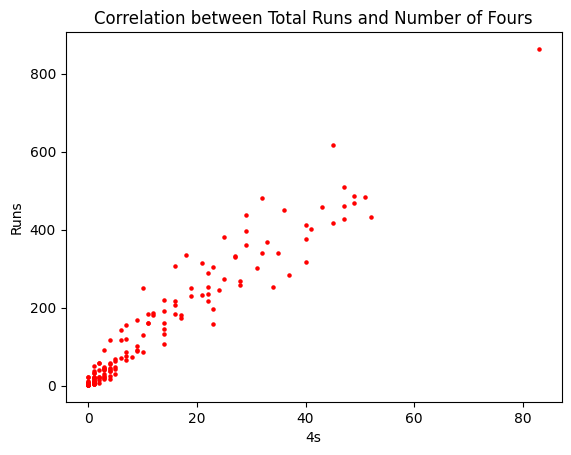

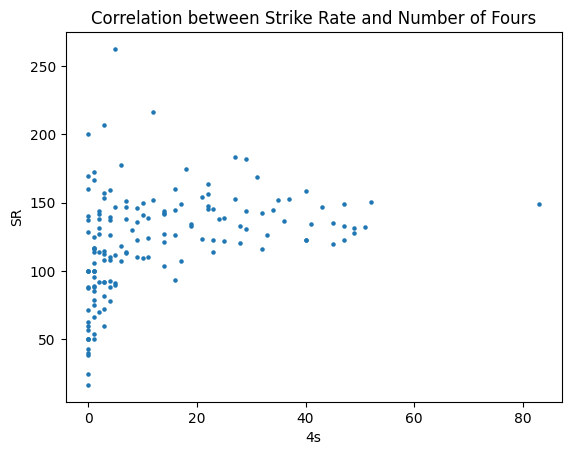

In [3]:
import matplotlib.pyplot as plt                                       # importing matplotlib
plt.scatter(dfcopy['4s'], dfcopy['Runs'],c="red",s=5)                 # [plotting
plt.ylabel('Runs')                                                    #  Runs
plt.xlabel('4s')                                                      #  v/s
plt.title('Correlation between Total Runs and Number of Fours')       #  number of
plt.show()                                                            #  fours.]
                                                                      #
plt.scatter(dfcopy['4s'], dfcopy['SR'],s=5)                           # [plotting
plt.ylabel('SR')                                                      #  Strike
plt.xlabel('4s')                                                      #  Rate
plt.title('Correlation between Strike Rate and Number of Fours')      #  v/s
plt.show()                                                            #  fours.]


## 4. Single Linear Regression on 4s

In [4]:
from sklearn import linear_model
import numpy as np

reg_Runs = linear_model.LinearRegression()             #linear regression on 4s where independent variable is Runs
reg_Runs.fit(dfcopy[['Runs']],dfcopy['4s'])
print(reg_Runs.predict([[300]]))                              #example predicting fours if runs are 300.

reg_SR = linear_model.LinearRegression()               #linear regression on 4s where independent variable is Strike Rate
reg_SR.fit(dfcopy[['SR']],dfcopy['4s'])
print(reg_SR.predict([[150]]))                                #example predicting fours if strike rate is 150.

[26.87029919]
[17.34391156]


C:\Users\thetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\thetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 5. Creating two Dataframes one for Features and one for Target

In [5]:
x = dfcopy[['Runs','Avg','BF','SR']]                        #Feautures
y = dfcopy['4s']                                            #Target

## 6. Splitting Datasets by train_test_split utility in sklearn

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

print('x_train')
print(x_train)
print('x_test')
print(x_test)
print('y_train')
print(y_train)
print('y_test')
print(y_test)

x_train
     Runs    Avg   BF      SR
132     7      7    5  140.00
47    206  22.89  129  159.68
71     91  22.75   44  206.81
57    161     23  113  142.47
35    258   25.8  194  132.98
..    ...    ...  ...     ...
99     37   18.5   40   92.50
115    19     19   11  172.72
94     43   21.5   48   89.58
138     6      6    6  100.00
80     67   13.4   59  113.55

[130 rows x 4 columns]
x_test
     Runs    Avg   BF      SR
34    268  19.14  223  120.17
91     44     11   28  157.14
90     45   22.5   40  112.50
36    253     23  175  144.57
28    306  38.25  212  144.33
92     43  10.75   28  153.57
77     73  24.33   56  130.35
46    216  19.64  231   93.50
105    24      8   26   92.30
81     63  15.75   24  262.50
26    317   31.7  259  122.39
79     69  17.25   47  146.80
16    397  36.09  303  131.02
101    33   16.5   50   66.00
20    361  27.77  251  143.82
15    401  30.85  298  134.56
29    303  43.29  208  145.67
108    23   5.75   26   88.46
137     6      6    3  200.00
8

## 7. Training Linear Regrresion model on train data and predicting values on test data

In [7]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(x_train,y_train)

y_predicted = reg2.predict(x_test)
print(y_predicted)

[26.44465066  3.27860407  2.44190674 22.90739169 26.41902434  3.23393732
  4.90759823 23.00569587  2.06816181  3.99448276 29.95337082  5.10321727
 36.98404135  2.6844504  33.22856904 37.68501741 25.43608985  2.26196769
  0.15918714  4.22097481  1.48260912 42.43194462 25.1947921   5.08504734]


## 8. Finding Mean Squared Error on train data predictions and test data predictions.

In [8]:
from sklearn.metrics import mean_squared_error
                                                                                 # Calculating the mean squared error on the train data predictions
mse_train = mean_squared_error(y_train, reg2.predict(x_train))
                                                                                 # Calculating the mean squared error on the test data predictions
mse_test = mean_squared_error(y_test, y_predicted)
                                                                                 # Printing the mean squared errors
print('Mean squared error on training data:', mse_train)
print('Mean squared error on test data:', mse_test)


Mean squared error on training data: 14.427424503635628
Mean squared error on test data: 23.494653823894982


## THANK YOU!